## Python Visualizations - Matplotlib and Seaborn
1. Bar plots
2. Scatter plot
3. Plotting in multiple subplots

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ploting Barplots

In [10]:
#display the counts of categorical features, as well as compare the counts across the features.
counties=['Nairobi','Mombasa','Kisumu','Garissa','Eldoret']
schools=[105,96,140,39,160]


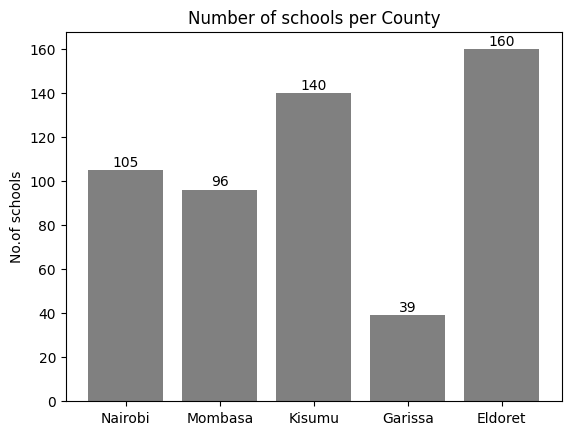

In [11]:
plt.bar(counties,schools,color='grey')

plt.title('Number of schools per County')
plt.ylabel('No.of schools')

#annotations
for x, height in enumerate (schools):
    plt.text(x, height+2, str(height),ha='center')


plt.show()

### Plotting a grouped bar chart

In [13]:
counties=['Nairobi','Mombasa','Kisumu','Garissa','Eldoret']
boy_schools=[102,79,87,40,100]
girl_schools=[99,65,95,25,99]

In [30]:
x=np.arange(len(counties))
x

array([0, 1, 2, 3, 4])

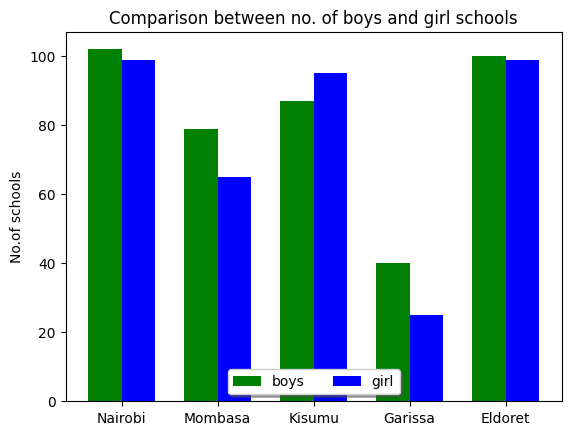

In [29]:
bar_width=0.35
x=np.arange(len(counties))

plt.bar(x-bar_width/2, boy_schools,bar_width,label='boys',color='green')
plt.bar(x+bar_width/2, girl_schools,bar_width,label='girl',color='blue')



plt.title('Comparison between no. of boys and girl schools')
plt.ylabel('No.of schools')
plt.legend(loc='lower center',fancybox=True, ncol=2,shadow=True)
plt.xticks(x,counties)
plt.show()

### Stacked Bar charts

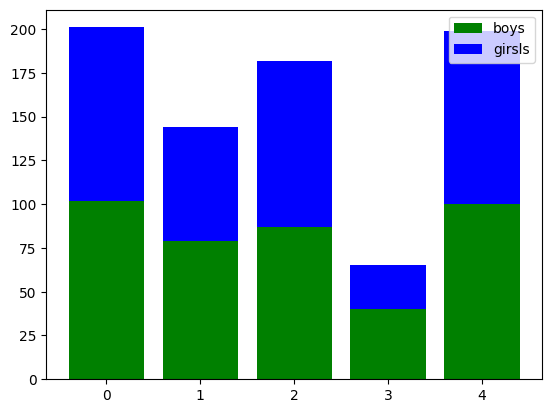

In [32]:
bar_width=0.35
x=np.arange(len(counties))

plt.bar(x,boy_schools,label='boys',color='green')
plt.bar(x,girl_schools, bottom=boy_schools, label='girsls',color= 'blue')

plt.legend()
plt.show()

## Scatter Plots with Matplotlib

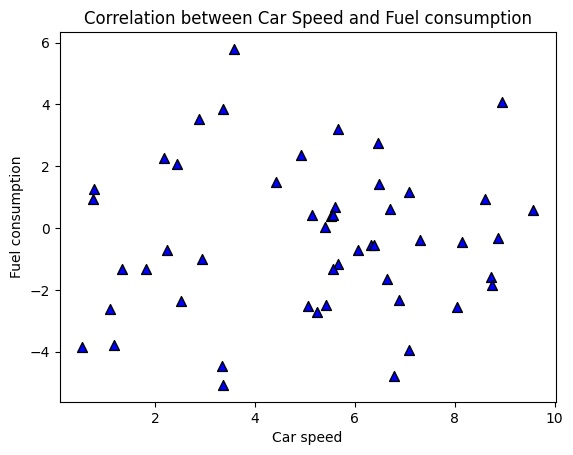

In [40]:
x=np.random.uniform(0,10,50)
y=np.random.normal(0,2,50)

plt.xlabel('Car speed')
plt.ylabel('Fuel consumption')
plt.title('Correlation between Car Speed and Fuel consumption')
plt.scatter(x,y, marker='^', color='blue',s=50, edgecolor='black')
plt.show()

### Colour/ Color bars

In [41]:
# We have temperature data taken from different latitides and longitudes.

lat=np.random.uniform(-100,-70, 50)
long=np.random.uniform(30,50,50)

temp=np.random.uniform(0,40,50)

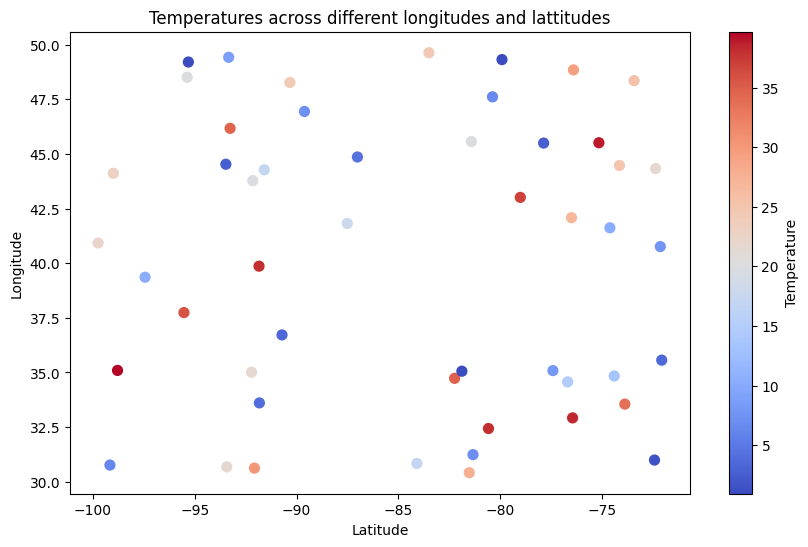

In [47]:
plt.figure(figsize=(10,6))

scatter=plt.scatter(lat,long, c=temp, cmap='coolwarm',s=50)

cbar=plt.colorbar(scatter)
cbar.set_label('Temperature')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Temperatures across different longitudes and lattitudes')
plt.show()

##### Add annotations/text to a scatter plot

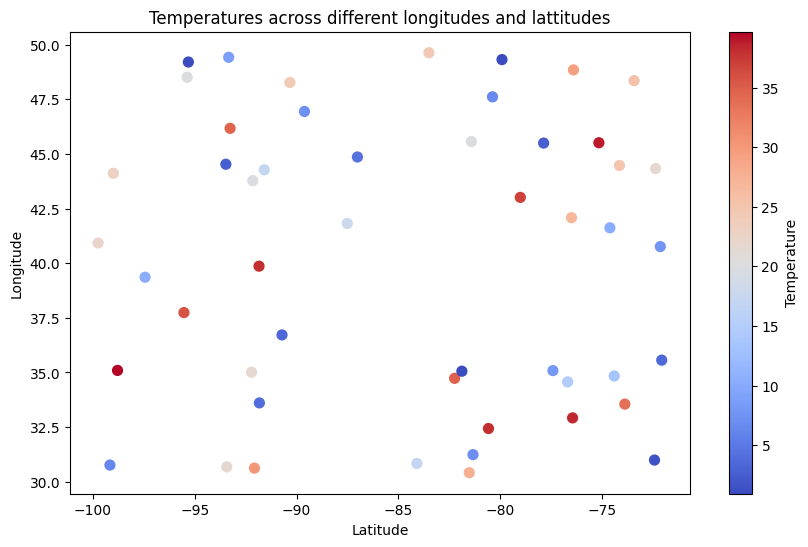

In [51]:
plt.figure(figsize=(10,6))
max_temp=np.argmax(temp)

scatter=plt.scatter(lat,long, c=temp, cmap='coolwarm',s=50)

cbar=plt.colorbar(scatter)
cbar.set_label('Temperature')

plt.annotate(
    f'Max temp:{temp[max_temp]:} C',
    (x[max_temp],y[max_temp]),
    textcoords='offset points',
    xytext=(10,10),
    arrowprops=dict(arrowstyle='->',color='black')
)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Temperatures across different longitudes and lattitudes')
plt.show()

### Plotting in multiple subplots

C:\Users\Pula Advisors\AppData\Local\Temp\ipykernel_19400\3967830053.py:5: RuntimeWarning: divide by zero encountered in log
  y4=np.log(x)


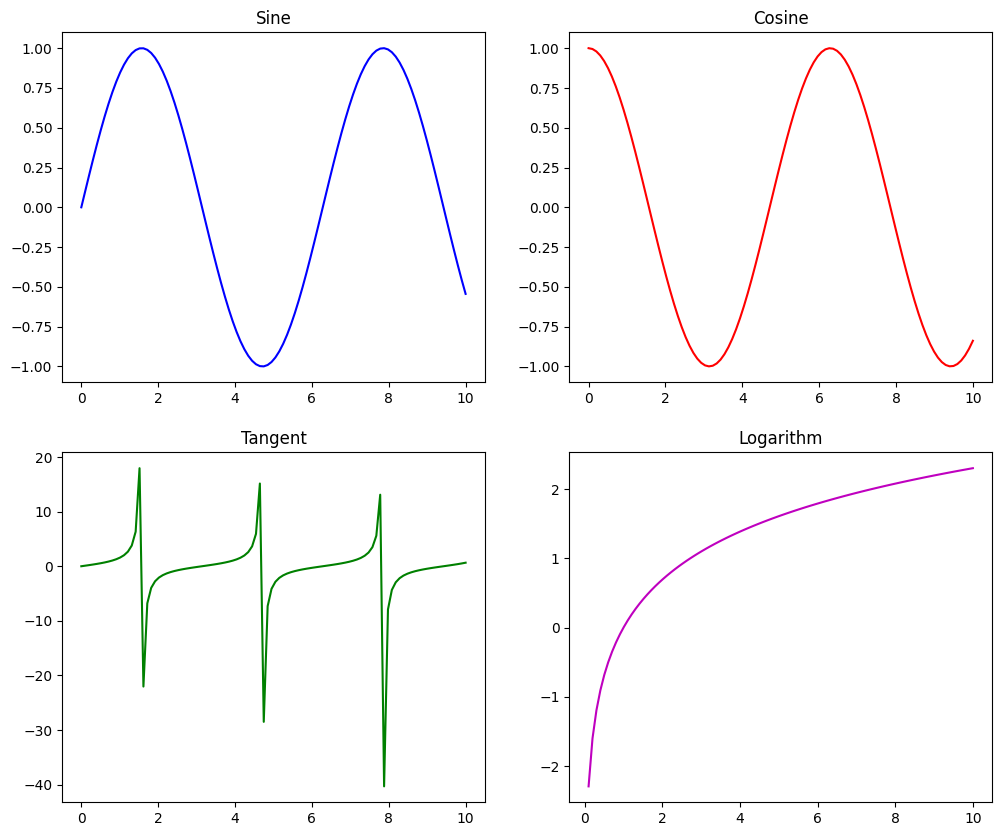

In [ ]:
x=np.linspace(0,10,100)
y1=np.sin(x)
y2=np.cos(x)
y3=np.tan(x)
y4=np.log(x)

fig,axs=plt.subplots(2,2,figsize=(12,10))

axs[0,0].plot(x,y1,'b-')
axs[0,0].set_title('Sine')

axs[0,1].plot(x,y2,'r-')
axs[0,1].set_title('Cosine')

axs[1,0].plot(x,y3,'g-')
axs[1,0].set_title('Tangent')

axs[1,1].plot(x,y4,'m-')
axs[1,1].set_title('Logarithm')

plt.show()

### Data Visualizations L2
1. Contour plots
2. Histograms
3. KDE plots
4. Box plots
5. Violin plots

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Plotting Contour plots

Contour plots are a graphical representation of 3D data on a 2D scale.It uses contour lines to represent different levels of elevations- the the case of topographic maps, or intensity- in the case of weather maps.

Some places you may have seen a contour plot
1. Topographic maps-representing elevations on a landscape
2. Weather forecasting- displaying rainfall or air pressure variations


In [3]:
nai_temp=pd.read_csv(r'C:\Users\Pula Advisors\Desktop\25b_PyData_Class\datasets\Artificial_Temperature_Dataset.csv')
nai_temp.head()

,Longitude,Latitude,Temperature
0,3.745401,0.157146,37.056869
1,9.507143,3.182052,22.238948
2,7.319939,1.571780,27.812766
3,5.986585,2.542853,27.546294
4,1.560186,4.537832,34.861488


Imagine, you are working for NEMA as a climate analyst and you have been tasked to identify heat islands in Nairobi County. So you collected temperature data from various neighbourhoods in Nairobi, represented as the Longitiude and Latitude in the dataframe above. How can you visualize, the temperature from the various neighbourhoods? 
Note, this requires you to plot: the laltitude , longitude and temperature, that is 3D dimensional data on a 2D scale... a contour plot would be most useful for this.

Remember ladies, the plt.contour() method only works on structured grid data. If you tried to use the plt.contour() on the data as is, the function would not know how to connect the points of the contour lines. Thus, we have to:

1. Transform our 'unstructured' data into a grid and 
2. Perform some interpolation- to fill in any missing values- neighbourhoods from which no temperature data was taken from- because this was artificially generated data!


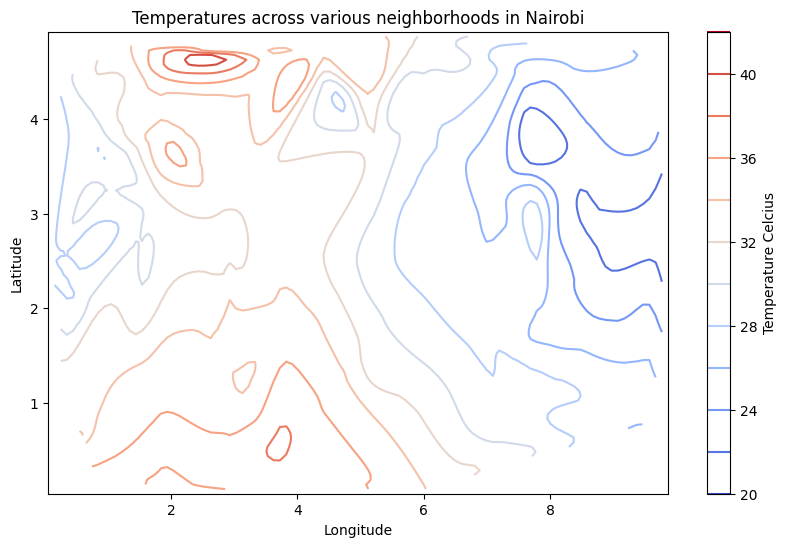

In [ ]:
from scipy.interpolate import griddata
#plt.contour()
X=nai_temp['Longitude'].values
Y=nai_temp['Latitude'].values
Z=nai_temp['Temperature'].values

#create a grid for interpolation
xi = np.linspace(min(X), max(X), 100)
yi = np.linspace(min(Y), max(Y), 100)
Xi, Yi = np.meshgrid(xi, yi)
Zi = griddata((X, Y), Z, (Xi, Yi), method='cubic')
#create the contour plot
plt.figure(figsize=(10,6))
contour=plt.contour(Xi,Yi,Zi, levels=10,cmap='coolwarm')


plt.title('Temperatures across various neighborhoods in Nairobi')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.show()



Customizing contour plots... Try out the following
1. Instead of contour lines, fill them in with plt.contourf()
2. Add a color bar, incorporate this line of code in your plot #plt.colorbar(label='Temperature Celcius')#
3. Try a different color map from 'coolwarm'. Check out Matplotlib documentation for a comprehensive list of color maps.
4. Add datapoints to the plot-works best if you are not dealing with large datasets. #plt.scatter(X,Y,Z,cmap='coolwarm')#

### Plotting Histograms
Histograms are used to show the distribution of data. It groups data into bins and shows how many values fall into those bins.
Some places where you might have seen a histogram:
1. Visualizing the distribution of test scores of pupils in a class.
2. Visualizing the distribution of patient ages in a hospital


In [31]:
'''
I will be using a dataset that has been tracking and monitoring earthquake events since 1965, detailing
the location where the earthquake occured- latitude and longitude, the depth and the its magnitude
'''
quake_df=pd.read_csv(r'C:\Users\Pula Advisors\Desktop\25b_PyData_Class\datasets\Earthquakes_v3.csv')
quake_df.head()

,DATETIME,LAT,LONG,DEPTH,MAGNITUDE
0,1/7/1965 10:22,36.50,26.50,10,5.3
1,1/10/1965 8:02,39.25,22.25,10,4.9
2,1/12/1965 17:26,37.00,22.00,10,4.0
3,1/15/1965 14:56,36.75,21.75,10,4.5
4,3/9/1965 19:16,39.00,24.00,10,4.2


To plot a histogram with matplotlib.pyplot you just need to call the 'plt.hist()' function and pass several parameters to customize it. For example:


bins- buckets that the data are sorted into

color-color of the bars

alpha-transparency of the color, a low alpha value is more transparent than a higher one

ylim-limits the values displayed on y-axis

xlim-limits values displayed on x-axis

yticks-customization for ticks on the y-axis

xticks-customization for ticks on the x-axis



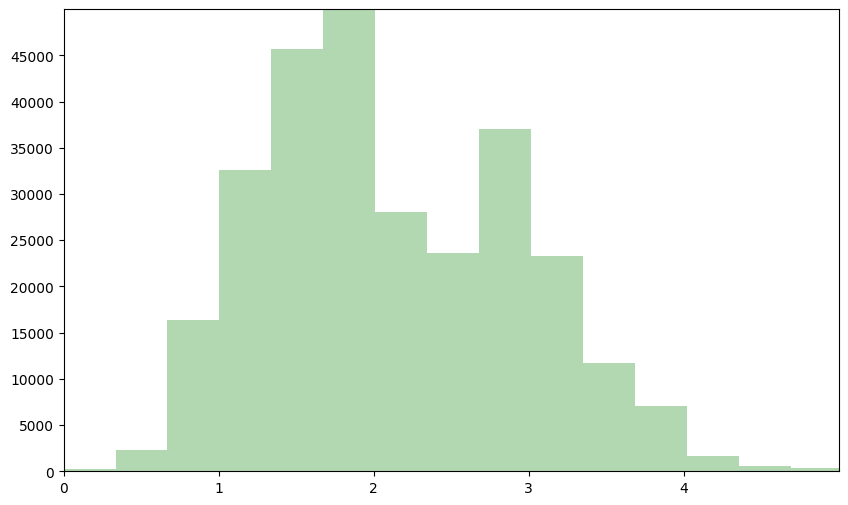

In [32]:
#plt.hist()
plt.figure(figsize=(10,6))

plt.hist(quake_df['MAGNITUDE'],bins=20, color='green', alpha=0.3)

plt.ylim(0,50000)
plt.xlim(1,5)
plt.yticks(range(0,50000,5000))
plt.xticks(range(0,5,1))

plt.show()

Try it out:
Customize the color, no. of bins, transparency of your plot!

## Plotting KDE Plots
Kernal Density Estimation is more simply though of as a smoothed out version of a histogram. However, whereas a histogram plots the count of values falling within each bin, the kde plot plots the density- which is a probability-like values that shows how common (likely) each value is.

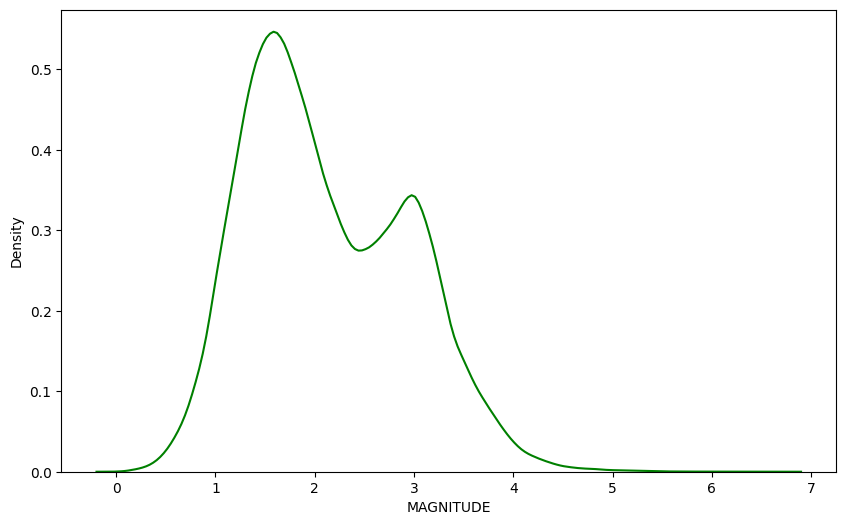

In [33]:
#sns.kde()
plt.figure(figsize=(10,6))

sns.kdeplot(data=quake_df, x='MAGNITUDE' ,color='green')



plt.show()

Customizations you can make on kdeplots

1. Bandwidth- you can adjust the smoothness of the curve using the 'bw_adjust'. A small bandwidth produces a more detailed but raggedy curve while a large one produces a smoother curve but it has lost detail.

2. Shading using the 'fill' parameter- fills the area under the curve

3. cut- controls how far the kde curve extends beyond the extreme data point.

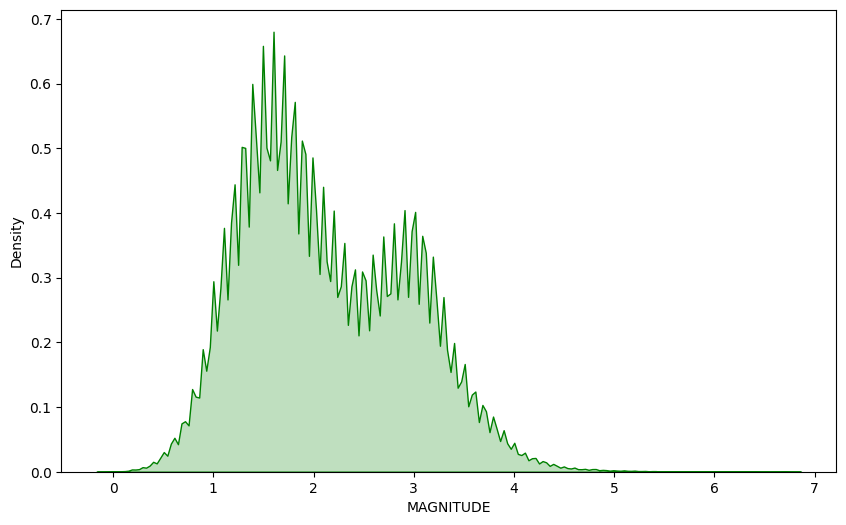

In [35]:
#let is implement these customizations

#sns.kde()
plt.figure(figsize=(10,6))

sns.kdeplot(data=quake_df, x='MAGNITUDE' ,color='green',fill=True, bw_adjust=0.5,cut=5)



plt.show()

You can also have bivariate kde plots, which compares the probabilty density functions of 2 features in your dataset. In our  case, we can compare between 'MAGNITUDE' & 'DEPTH'

PS: I tried to plot the kde on the entire dataset and it took quite a long time, so I filtered the dataframe to just the first 2,000 observations. But if you have a powerful computer (unlike mine woi!), you can skip this part!

In [37]:
modified_df=quake_df.loc[0:2000]
modified_df.shape

(2001, 5)

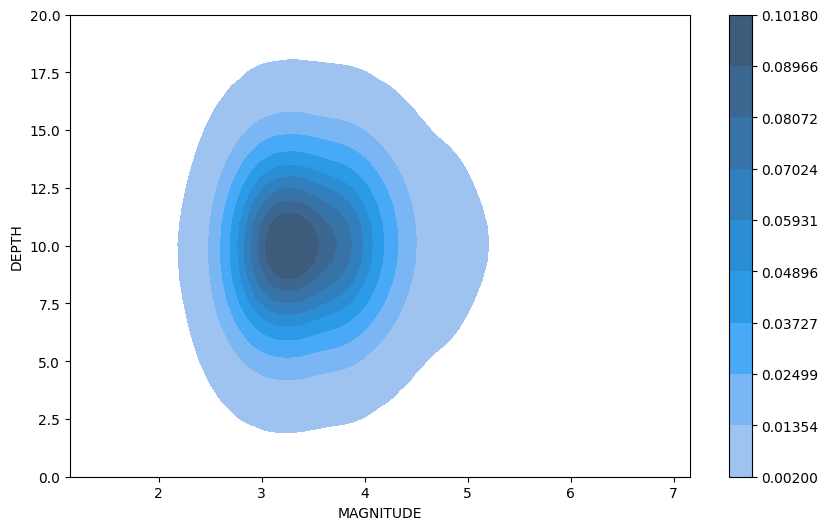

In [38]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=modified_df,x='MAGNITUDE',y='DEPTH',fill=True,cbar=True)
plt.ylim(0,20)

plt.show()

Yap! a bivariate kde, just gives you a contour plot.

#### TRY IT OUT!!!
Play around with the customizations, add a plot title, and labels for both axes.

### Plotting Box plots

Box plots are also called box and whisker plots. They are another great way to visualize data distribution and are also very useful in quickly identifying outliers in your data.

##### Components of a Box plot

1. Median- the middle value of your data-represented by the line within the box

2. Boxes- the box represents the interquatile range, where the bottom egde of the box is the 1st quartile and the top edge is the 3rd quartile

3. Whiskers - these are vertical lines that extend from the boxes- the points at the end of the whiskers tell us the maximum and minimum values in our data-excluding outliers.

4. Outliers- any value that falls outside the caps of the whiskers (the end of the whiskers)

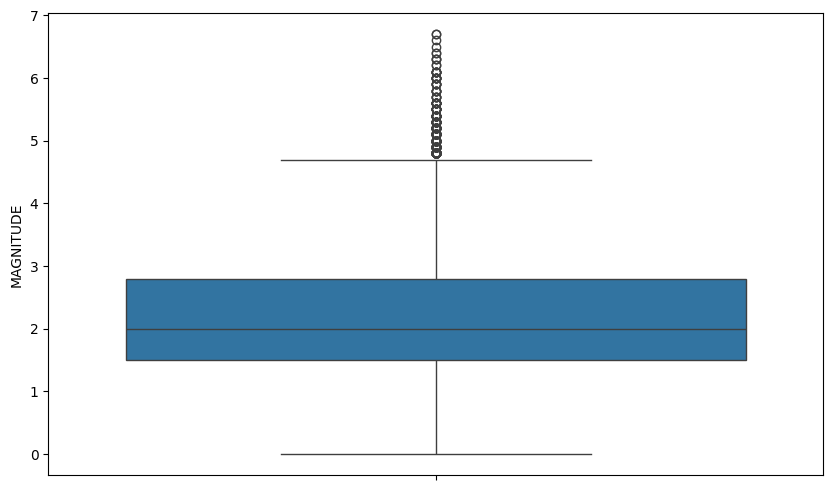

In [40]:
#seaborn is a better library for this kind of thing,so let us use that, but there is a matplotlib method 
#for box plots, you can use that too

plt.figure(figsize=(10,6))
sns.boxplot(data=quake_df,y='MAGNITUDE')

plt.show()

What can we learn about our data from this box plot?

Let us try and interpret it, shall we?

1. We know that the box itself represents the inter quatile range- which is just the range in which 50% of your data lies. For our graph above, we can deduce that 50% of earthquakes that occur have a magnitude ranging from 1.5 to 2.8.

2. Remember also, the bottom edge of the box is the 1st quartile- which just means 25% of earthquakes in our data fall below a magnitude of 1.5

3. Given this logic, can you figure out what the 3rd quartile range is and what it means in this context?

4. From the whiskers, we can also tell that the minimum magnitude of an earthquake in our dataset is 0 and the maximum is around 4.8.

5. And lastly we can tell that our dataset has quite a number of outliers.

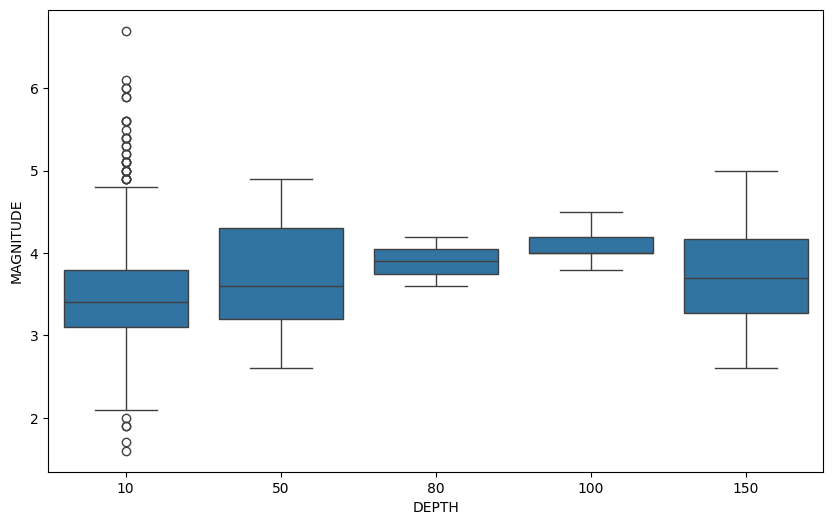

In [42]:
#You can also plot multiple box plots on the same figure, just pass another feature in the list of parameters

plt.figure(figsize=(10,6))

sns.boxplot(data=modified_df,y='MAGNITUDE',x='DEPTH')

plt.show()

From this plot, we can learn the distribution of earthquake magnitudes at various depths.

#### Assignment
1. Using the same data, plot Violin plots!